<a href="https://colab.research.google.com/github/Vizzeyly/Hamoye-2022-Selenium-Group/blob/Abu_umar/Capstone_Project_Vishal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=d40696de604d65bdacd6421e12e39ff5fb0e9f34a9ccc4ac310ec59764f87ebf
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

import scipy
import statsmodels
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

from random import randrange
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [7]:
url = 'https://raw.githubusercontent.com/garg1709/Hamoye-Data-Science-Internship/main/1st_Capstone_Project/Foreign_Exchange_Rates.csv'
df = pd.read_csv(url, sep=',')
print('DATASET SHAPE: ', df.shape)
df.head()

DATASET SHAPE:  (5217, 24)


,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [10]:
# Let's extract one country's data and try to understand its behaviour. We'll take UK for illustration purpose. All our EDA and model building
# will revolve around UK.

In [11]:
df.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [12]:
data = df[['Time Serie', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$']]
data.columns = ['date', 'rate']

In [13]:
data.head(15)

,date,rate
0,2000-01-03,0.6146
1,2000-01-04,0.6109
2,2000-01-05,0.6092
3,2000-01-06,0.607
4,2000-01-07,0.6104
5,2000-01-10,0.6107
6,2000-01-11,0.6068
7,2000-01-12,0.6073
8,2000-01-13,0.6067
9,2000-01-14,0.6115


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    5217 non-null   object
 1   rate    5217 non-null   object
dtypes: object(2)
memory usage: 81.6+ KB


In [15]:
data.rate.describe()

count     5217
unique    2303
top         ND
freq       198
Name: rate, dtype: object

In [16]:
data.nunique()

date    5217
rate    2303
dtype: int64

In [17]:
# We can see we have some value 'ND' in our dataset. Let's remove these values to ensure we are able to make forecasting accurately.
# We are not sure of what ND means (Maybe it stands for No Data).

In [18]:
# Remove rates with a value of ND.

data = data.drop(data[data['rate']=='ND'].index)

# Converts the rates to numeric value.

data['rate'] = pd.to_numeric(data.rate)
data['date'] = pd.to_datetime(data.date)

# Sort values by date. This is important as the values should always be in ascending order to make forecasts.
data = data.sort_values('date', ascending=True)

In [19]:
data1 = data.copy()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5019 non-null   datetime64[ns]
 1   rate    5019 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 117.6 KB


In [21]:
data.set_index('date',inplace=True)

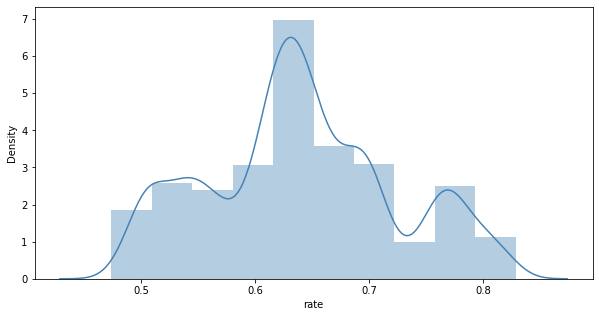

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(data.rate, bins=10, color='steelblue');

In [23]:
# From the above graph, we can see that our UK Exchange Rates follows more or less a Gaussian Distribution.

In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data.rate, marker_color='lightgreen'))

fig.update_layout(title='TIME-SERIES PLOT OF UNITED KINGDOM POUND RATE', 
                  height=450, width=1000, template='plotly_dark', font_color='lightgreen', 
                  font=dict(family="sans serif",
                            size=16,
                            color="grey"
                            ))

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Rate / $')
fig.show()

In [25]:
# From the plot above, we can see that the data is non-stationary.
# There is obviously trend in the dataset along with randomness. We cannot see any kind of seasonality in the dataset.

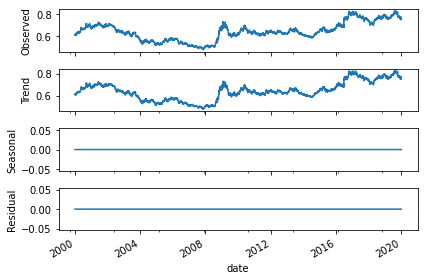

In [26]:
# We'll choose additive instead of multiplicative since there is no exponential increase in the amplitudes over time.
sdec = seasonal_decompose(data, model='additive', freq = 1)
sdec.plot();

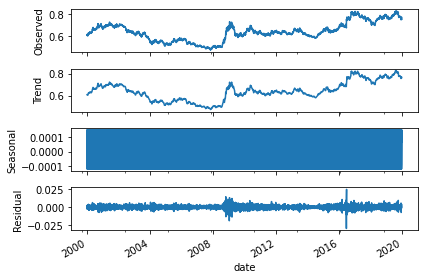

In [27]:
# We'll choose additive instead of multiplicative since there is no exponential increase in the amplitudes over time.
sdec = seasonal_decompose(data, model='additive', freq = 5)
sdec.plot();

In [28]:
# It is pretty clear from the decomposition that there is no seasonal component in our Time Series.

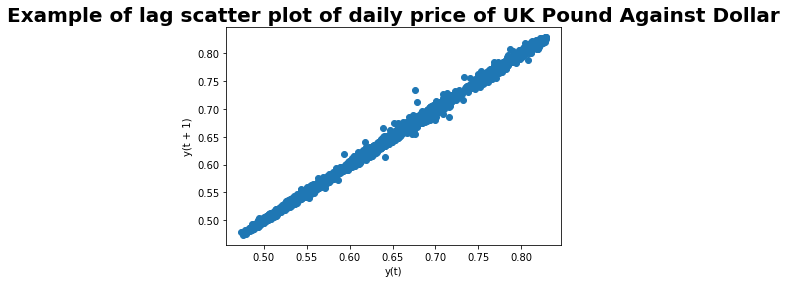

In [29]:
from pandas.plotting import lag_plot
lag_plot(series = data.rate)
plt.title('Example of lag scatter plot of daily price of UK Pound Against Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

In [30]:
# From the above lag plot, we can see that the values of exchange rates at time period t and t+1 are highly positively correlated which is evident
# from the coalesced datapoints moving from left to right upwards. This means that the values are highly dependent on the previous values.

In [31]:
values = pd.DataFrame(data.rate.values)
lags = 7
columns = [values]

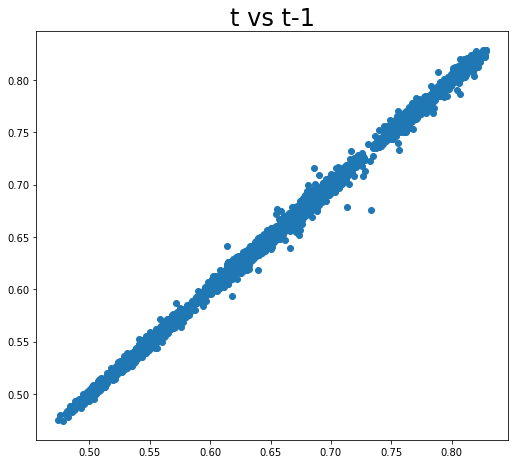

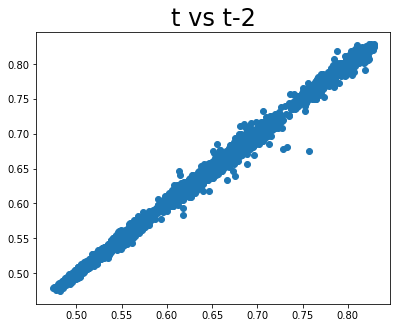

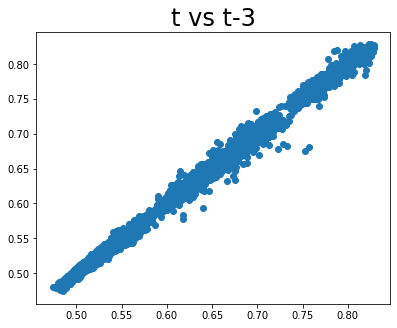

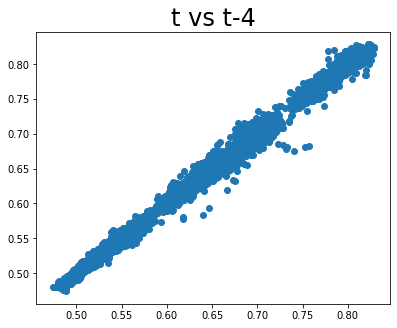

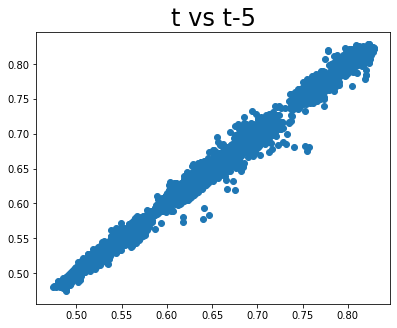

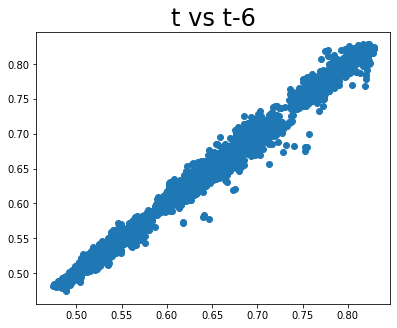

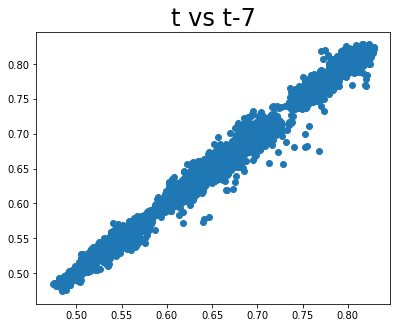

In [32]:
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)

columns = ['t']

for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))

dataframe.columns = columns

plt.figure(1, figsize=(8,6))

for i in range(1, (lags+1)):
  ax = plt.subplot(240 + i)
  plt.subplots_adjust(left = 0.1, bottom=0.1, right=1.9, top =2, wspace = -0.6, hspace = 0.01)
  ax.set_title('t vs t-' + str(i), family = 'Arial', fontsize = 24)
  plt.scatter(x = dataframe['t'].values, y = dataframe['t-'+str(i)].values)
  plt.show()

In [33]:
# As we can see from above lag plots, for 7 different lag values, there is high positive correlation among each one of them with values
# at time t.

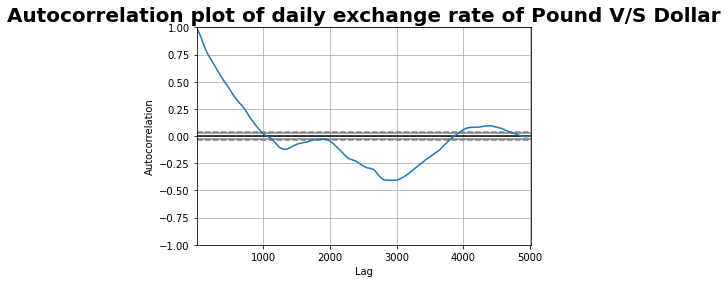

In [34]:
pd.plotting.autocorrelation_plot(data.rate)
plt.title('Autocorrelation plot of daily exchange rate of Pound V/S Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

In [35]:
# From the above AC plot, we can see that the initial lag values show a correlation with previous values. But it starts decreasing as time passes
# and becomes negative for a while. But for most of the part, it remains close to zero for higher values, which shows no correaltion.

In [36]:
# Let's perform ADF Test to confirm stationarity/non-stationarity of our dataset.

In [37]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['rate'].tolist())
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.219928
p-value 0.664965
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


<Figure size 864x432 with 0 Axes>

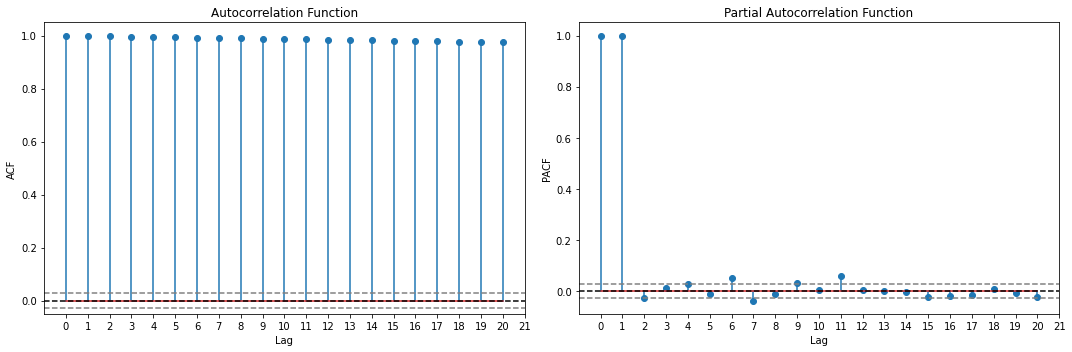

In [38]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data.rate, nlags = 20)
lag_pacf = pacf(data.rate, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [39]:
# Since our Test Statistic value is greater than our critical value at 5%, we can say that our time series is non-stationarity.
# We can also see from our ACF plot that there is high correlation between time series at time t and various other lag values. There is also
# no sign of any kind of seasonality.
# Now we'll difference our series once to see if this removes stationarity.

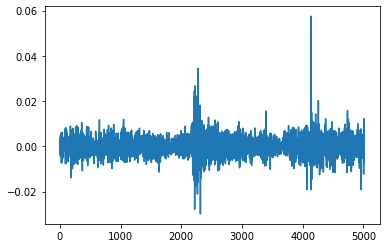

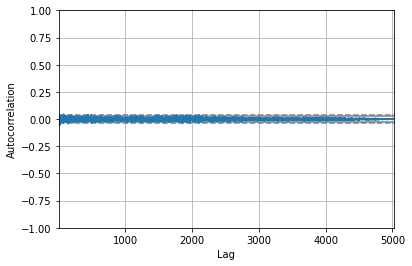

In [40]:
diff = list()
for i in range(1, len(data)):
  value = data['rate'].tolist()[i] - data['rate'].tolist()[i-1]
  diff.append(value)

# line plot

plt.plot(diff)
plt.show()

# Auto-correlation plot

pd.plotting.autocorrelation_plot(diff)
plt.show()

In [41]:
# Now let's plot our ACF and PACF plots.

<Figure size 864x432 with 0 Axes>

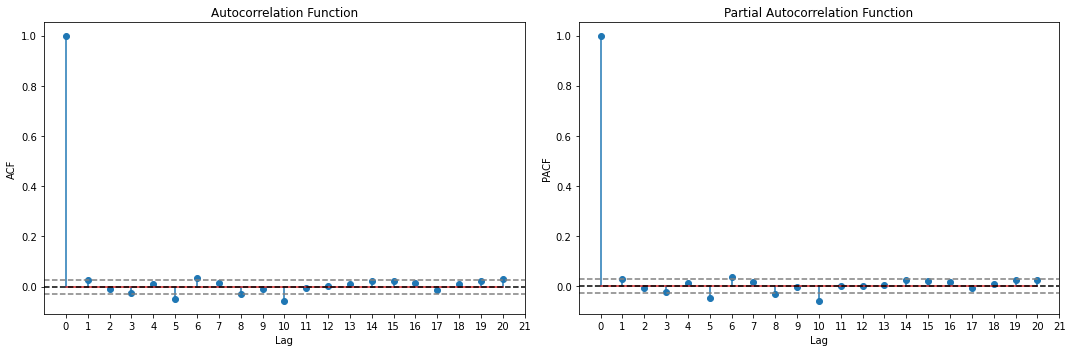

In [42]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(diff, nlags = 20)
lag_pacf = pacf(diff, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [43]:
# From the first line plot, we can see that the differenced time series has a mean close to 0 and a very small variance.
# This shows us that the data has become stationary now.
# Also, from the autocorrelation plot, we can see that the AC values at different lags are now close to zero. This is also a sign of stationarity.
# But we'll again run the ADF test to check for stationarity.

In [44]:
# Let's run the ADF test again after differencing.

In [45]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.503825
p-value 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [46]:
# We can see that our p-value is now approximately close to 0, so we can say that our time-series is now stationary.

In [47]:
X_train, X_val = data1[:-30], data1[-30:]

print('X_train Shape: ', X_train.shape)
print('X_val Shape: ', X_val.shape)

X_train Shape:  (4989, 2)
X_val Shape:  (30, 2)


In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
predictions = []

arima = ARIMA(X_train.rate,order=(10,1,10)).fit()
# Get a 30 days prediction.
predictions.append(arima.forecast(30))

In [50]:
#converting and reshaping 
predictions = np.array(predictions[0][0]).reshape((30,))

In [51]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.rate   No. Observations:                 4988
Model:               ARIMA(10, 1, 10)   Log Likelihood               20657.098
Method:                       css-mle   S.D. of innovations              0.004
Date:                Thu, 18 Aug 2022   AIC                         -41270.195
Time:                        11:12:40   BIC                         -41126.870
Sample:                             1   HQIC                        -41219.956
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.151e-05   5.46e-05      0.577      0.564   -7.55e-05       0.000
ar.L1.D.rate     -0.1100      0.181     -0.608      0.543      -0.464       0.244
ar.L2.D.rate      0.1885      0.039      4.872      0.000       0.113       0.264
ar.L3.D.rate     -0.5318      0.200     -2.657      0.008      -0.924      -0.140
ar.L4.D.rate     -0.2843        nan        nan        nan         nan         nan
ar.L5.D.rate      0.2311      0.197      1.174      0.240      -0.155       0.617
ar.L6.D.rate     -0.3745      0.039     -9.652      0.000      -0.451      -0.298
ar.L7.D.rate     -0.3819        nan        nan        nan         nan         nan
ar.L8.D.rate      0.1415        nan        nan        nan         nan         nan
ar.L9.D.rate     -0.1883      0.109     -1.734      0.083      -0.401       0.025
ar.L10.D.rate    -0.8647        nan        nan        nan         nan         nan
ma.L1.D.rate      0.1398      0.172      0.813      0.416      -0.197       0.477
ma.L2.D.rate     -0.1815      0.043     -4.224      0.000      -0.266      -0.097
ma.L3.D.rate      0.5122      0.186      2.749      0.006       0.147       0.877
ma.L4.D.rate      0.3114        nan        nan        nan         nan         nan
ma.L5.D.rate     -0.2577      0.196     -1.318      0.188      -0.641       0.126
ma.L6.D.rate      0.3812        nan        nan        nan         nan         nan
ma.L7.D.rate      0.4075        nan        nan        nan         nan         nan
ma.L8.D.rate     -0.1726      0.033     -5.307      0.000      -0.236      -0.109
ma.L9.D.rate      0.1816      0.086      2.121      0.034       0.014       0.349
ma.L10.D.rate     0.8596        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9233           -0.4020j            1.0071           -0.0654
AR.2             0.9233           +0.4020j            1.0071            0.0654
AR.3             0.5846           -0.8163j            1.0040           -0.1511
AR.4             0.5846           +0.8163j            1.0040            0.1511
AR.5             0.0797           -1.0096j            1.0128           -0.2375
AR.6             0.0797           +1.0096j            1.0128            0.2375
AR.7            -0.9677           -0.2876j            1.0096           -0.4540
AR.8            -0.9677           +0.2876j            1.0096            0.4540
AR.9            -0.7288           -0.7422j            1.0402           -0.3736
AR.10           -0.7288           +0.7422j            1.0402            0.3736
MA.1             0.9280           -0.4043j            1.0122           -0.0654
MA.2             0.9280           +0.4043j            1.0122            0.0654
MA.3     

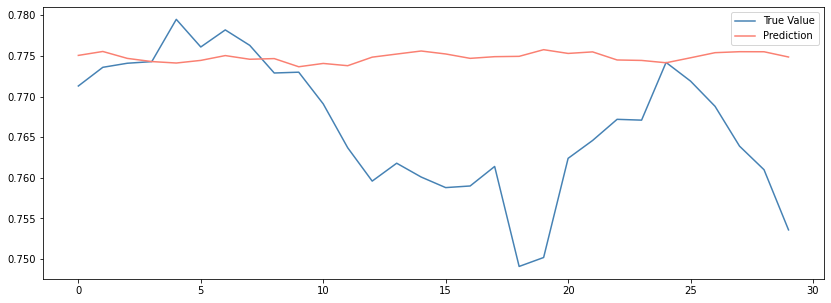

In [52]:
y_val = data.rate[-30:]
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, color='steelblue');
plt.plot(np.arange(len(y_val)), predictions, color='salmon');
plt.legend(['True Value', 'Prediction']);

In [53]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
mean_absolute_percentage_error(y_val,predictions)

1.1941433259417564

In [55]:
predictions1 = []

arima = sm.tsa.statespace.SARIMAX(X_train.rate,order=(10,1,10),seasonal_order=(10,1,10,1),
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
#get a 30 days prediction
predictions1.append(arima.forecast(30))
#converting and reshaping 
predictions1 = np.array(predictions1).reshape((30,))

In [56]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:                                rate   No. Observations:                 4989
Model:             SARIMAX(10, 1, 10)x(1, 1, 1, 1)   Log Likelihood               20477.750
Date:                             Thu, 18 Aug 2022   AIC                         -40909.500
Time:                                     11:13:32   BIC                         -40759.720
Sample:                                          0   HQIC                        -40856.991
                                            - 4989                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3181      0.321     -0.991      0.322      -0.947       0.311
ar.L2         -0.5137      0.214     -2.399      0.016      -0.934      -0.094
ar.L3         -0.8721      0.243     -3.595      0.000      -1.348      -0.397
ar.L4         -0.4708      0.358     -1.314      0.189      -1.173       0.232
ar.L5         -0.6724      0.263     -2.554      0.011      -1.188      -0.156
ar.L6         -0.5283      0.309     -1.710      0.087      -1.134       0.077
ar.L7         -0.5504      0.258     -2.130      0.033      -1.057      -0.044
ar.L8         -0.3245      0.215     -1.508      0.132      -0.746       0.097
ar.L9         -0.3382      0.179     -1.885      0.059      -0.690       0.013
ar.L10        -0.0492      0.158     -0.311      0.756      -0.359       0.261
ma.L1         -0.5323      0.183     -2.907      0.004      -0.891      -0.173
ma.L2          0.0350      0.177      0.197      0.844      -0.313       0.383
ma.L3          0.4831      0.151      3.203      0.001       0.188       0.779
ma.L4         -0.2093      0.171     -1.221      0.222      -0.545       0.127
ma.L5          0.2666      0.129      2.065      0.039       0.014       0.520
ma.L6         -0.0405      0.122     -0.331      0.740      -0.280       0.199
ma.L7          0.0345      0.116      0.296      0.767      -0.194       0.263
ma.L8         -0.3272      0.118     -2.780      0.005      -0.558      -0.097
ma.L9          0.0185      0.141      0.132      0.895      -0.257       0.294
ma.L10        -0.4714      0.089     -5.307      0.000      -0.646      -0.297
ar.S.L1        0.2304      0.860      0.268      0.789      -1.455       1.916
ma.S.L1       -0.4250      0.396     -1.074      0.283      -1.200       0.350
sigma2       1.18e-05   2.16e-06      5.456      0.000    7.56e-06     1.6e-05
===================================================================================
Ljung-Box (Q):                      192.98   Jarque-Bera (JB):             39664.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.3e+14. Standard errors may be unstable.
"""

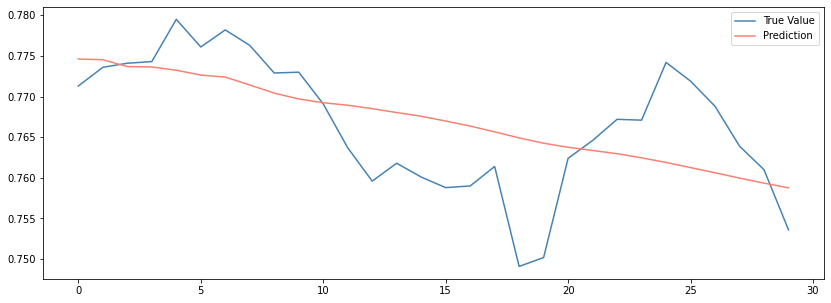

In [57]:
y_val = data.rate[-30:]
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, color='steelblue');
plt.plot(np.arange(len(y_val)), predictions1, color='salmon');
plt.legend(['True Value', 'Prediction']);

In [58]:
mean_absolute_percentage_error(y_val, predictions1)

0.7091704312931841

In [59]:
data1 = data1.rename(columns={'date' : 'ds','rate' : 'y'})

In [60]:
data1.shape

(5019, 2)

In [61]:
data1.head()

,ds,y
0,2000-01-03,0.6146
1,2000-01-04,0.6109
2,2000-01-05,0.6092
3,2000-01-06,0.6070
4,2000-01-07,0.6104


In [62]:
training_data = data1[data1['ds']<='2018-12-31']
testing_data = data1[data1['ds']>='2019-01-01']

In [63]:
training_data.tail()

,ds,y
4949,2018-12-21,0.7886
4952,2018-12-26,0.7889
4953,2018-12-27,0.7920
4954,2018-12-28,0.7875
4955,2018-12-31,0.7835


In [64]:
testing_data.head()

,ds,y
4957,2019-01-02,0.7938
4958,2019-01-03,0.7916
4959,2019-01-04,0.7849
4960,2019-01-07,0.7839
4961,2019-01-08,0.7859


In [65]:
training_data.shape

(4770, 2)

In [66]:
testing_data.shape

(249, 2)

In [67]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 87 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [68]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638784 sha256=47cb72aef2cdfa4a984530f6b43c5e4b0c987d8b3729e3186d211ff2bc1fd031
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [69]:
from fbprophet import Prophet

In [70]:
prophet = Prophet()
prophet.fit(training_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
future_dates = prophet.make_future_dataframe(periods=249, freq='D', include_history=False)

In [72]:
prediction = prophet.predict(future_dates)

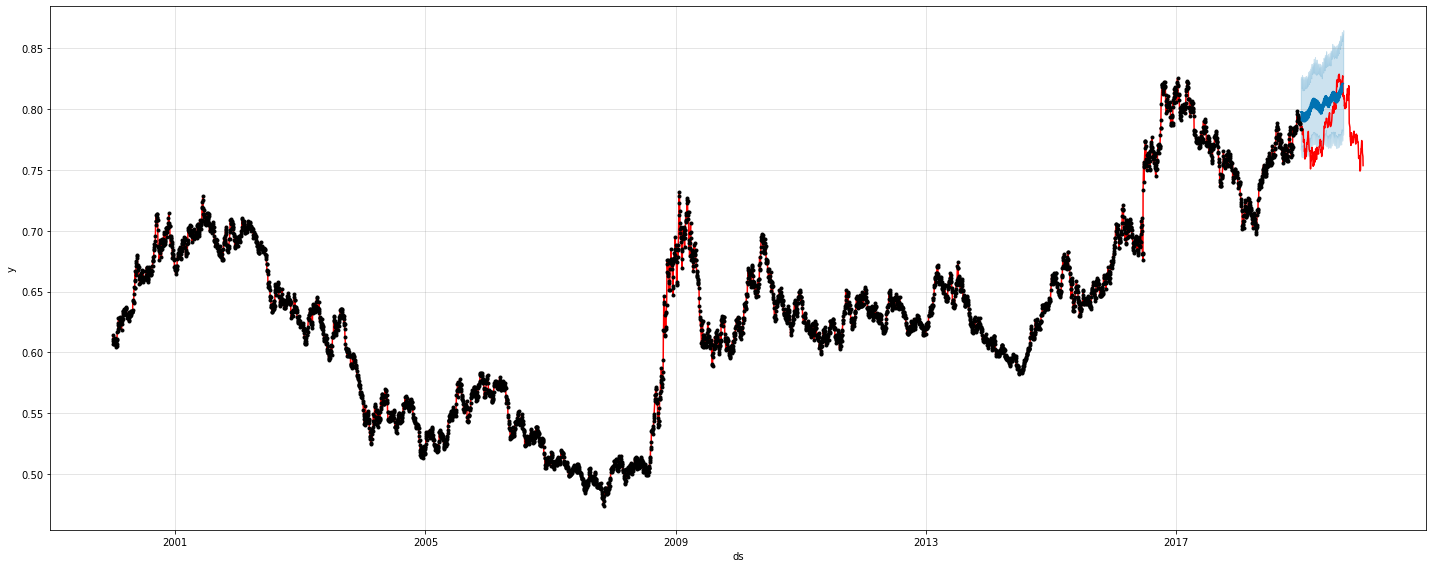

In [73]:
fig,axes = plt.subplots(figsize=(20,8))
plt.plot(data1.ds,data1.y,axes=axes,color='red')
prophet.plot(prediction, ax=axes)
plt.show()

In [74]:
temp = prediction[['ds','yhat']].rename(columns={
    'yhat' : 'y'
})

In [75]:
mean_absolute_percentage_error(testing_data.y,temp.y)

3.302232108000684